# Box Cox Transformation of time series data

**SciPy library provides a `boxcox()` function that transforms the time series data with both log and power operations. Using the airline passengers dataset, you can transform the input data before performing any exploratory data analysis.**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import boxcox

%matplotlib inline

In [3]:
df = pd.read_csv("data/airline_passengers.csv", index_col='Month', parse_dates=True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# i.e. 12 years of data (1949-1960)

df.shape

(144, 1)

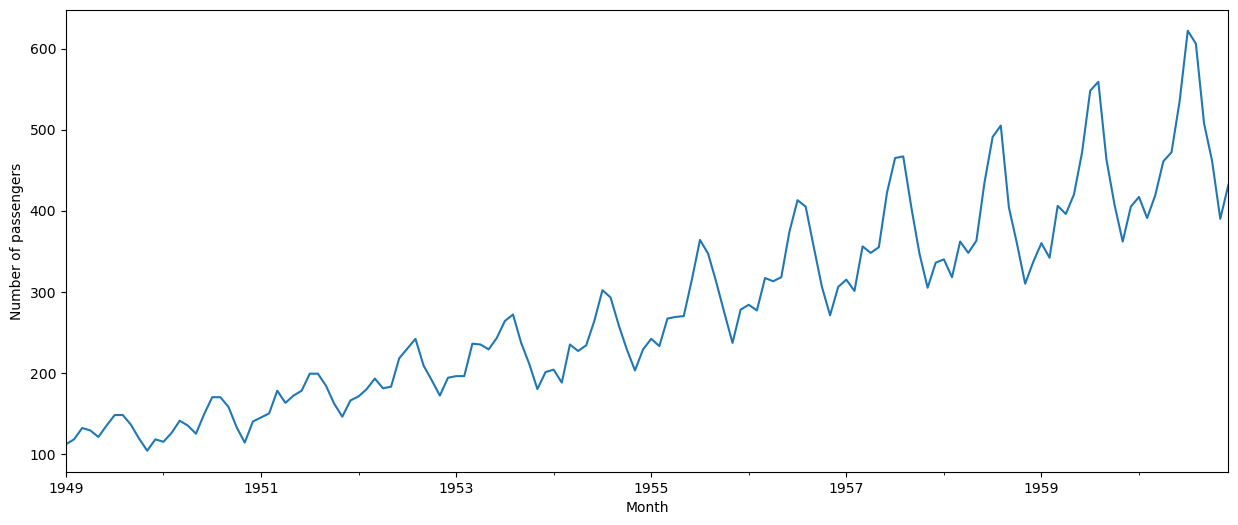

In [17]:
df['Passengers'].plot(figsize=(15, 6))
plt.ylabel("Number of passengers");

**As you can see, there is a steadily increasing trend in the number of passengers per year, with spikes appearing around the end of each year. The repeating pattern suggests 'seasonality'. Ideally, you want to remove the amplitude over time to better model the data.**

**Perform log and power transforms to view the effects on the data:**

In [7]:
# Transform number of passengers with power of 1/2 and plot (note the y-axis)

df['sqrt_passengers'] = np.sqrt(df['Passengers'])

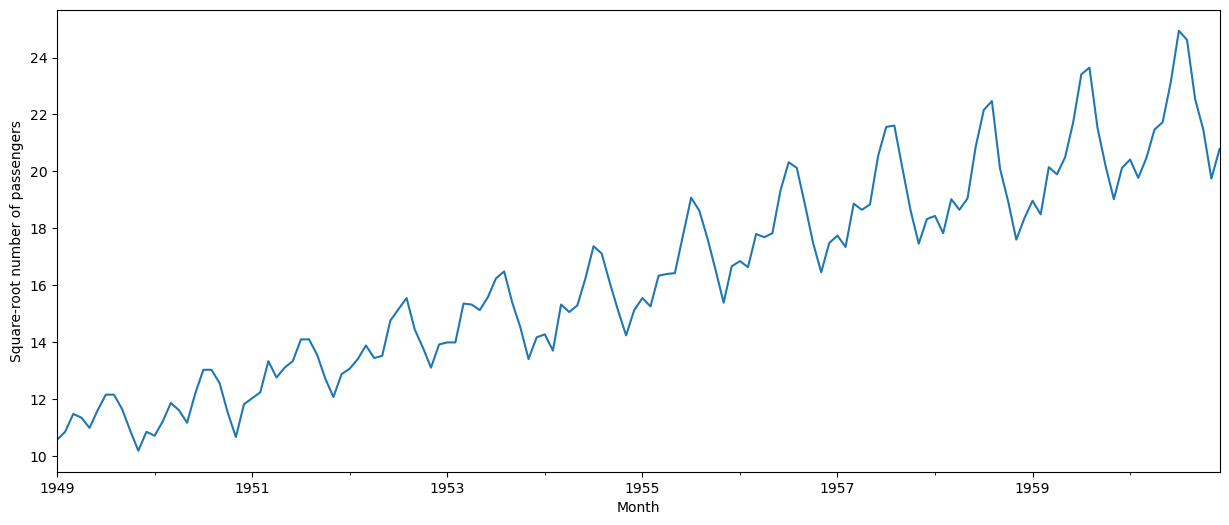

In [18]:
df['sqrt_passengers'].plot(figsize=(15, 6))
plt.ylabel("Square-root number of passengers");

In [9]:
# Transform number of passengers with log base and plot (note the y-axis)

df['log_passengers'] = np.log(df['Passengers'])

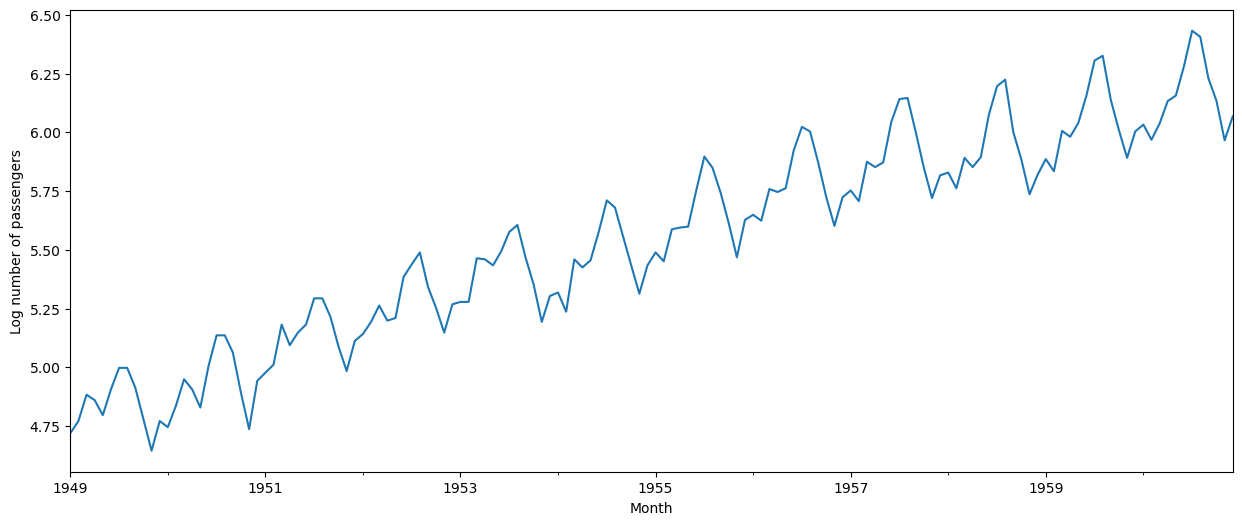

In [19]:
df['log_passengers'].plot(figsize=(15, 6))
plt.ylabel("Log number of passengers");

**Note that the shape of the distribution does not change but the range of the y-axis does. It gets smaller and smaller, but you can still see the trends in the behaviour.**

**The `boxcox` function accepts the time series data and returns the transformed data and the optimum lambda value. Note that the y-axis lies between the power transform with the log transform.**

In [20]:
data, lam = boxcox(df['Passengers'])

In [21]:
# Note that approx 0.15 represents the balance between log and power transform

lam

0.14802265137037945

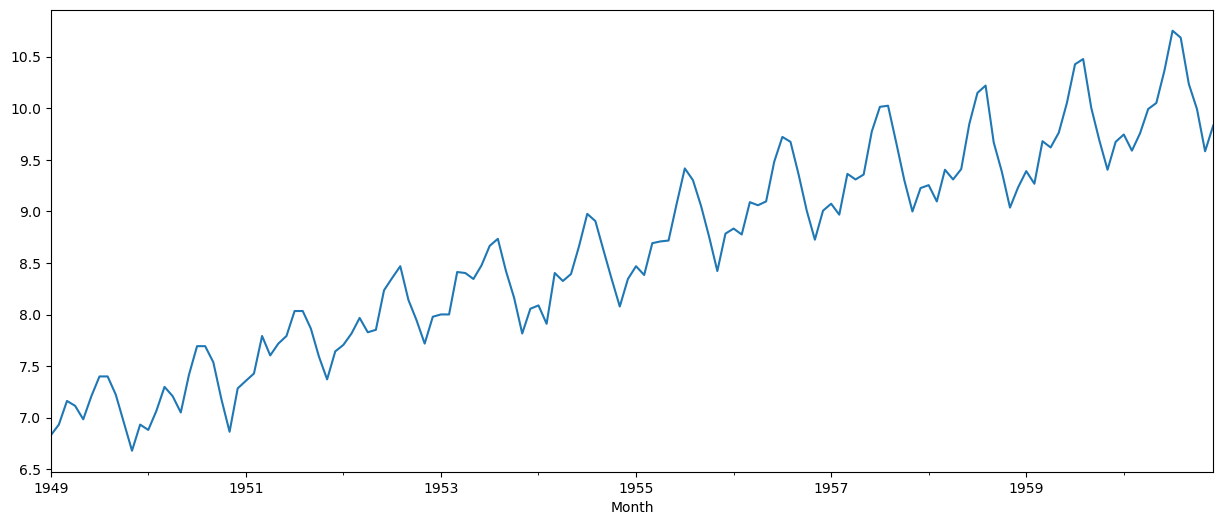

In [23]:
df['boxcox_passengers'] = data

df['boxcox_passengers'].plot(figsize=(15, 6));

**View the distribution of the original data compared with the transformed data, in order to see what impact the transforms have:**

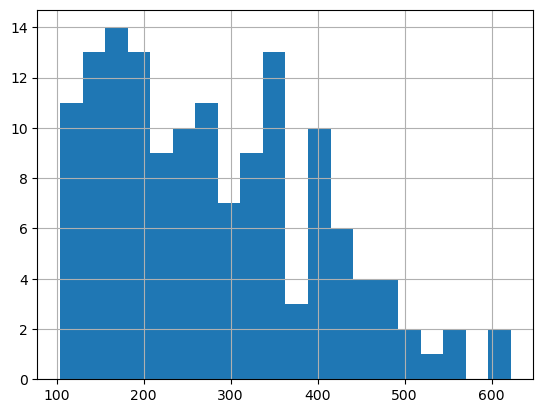

In [27]:
# Majority of values lie in the lower hundreds

df['Passengers'].hist(bins=20);

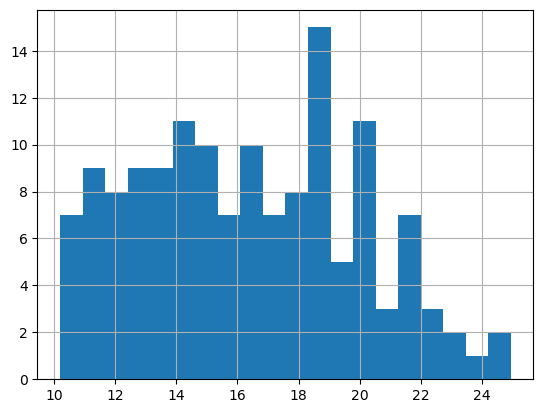

In [28]:
# Distribution is pushed further to the right and bit flatter than before

df['sqrt_passengers'].hist(bins=20);

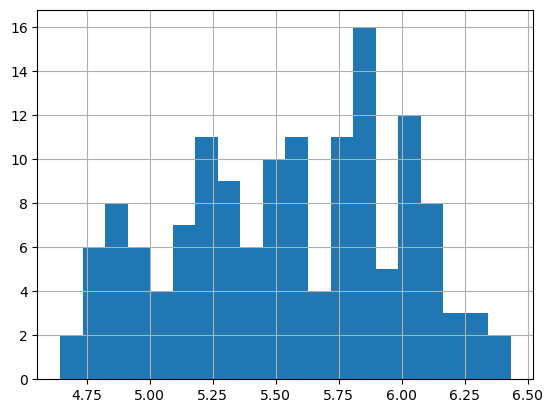

In [29]:
# Resembles a mountain and is more spaced out in the center

df['log_passengers'].hist(bins=20);

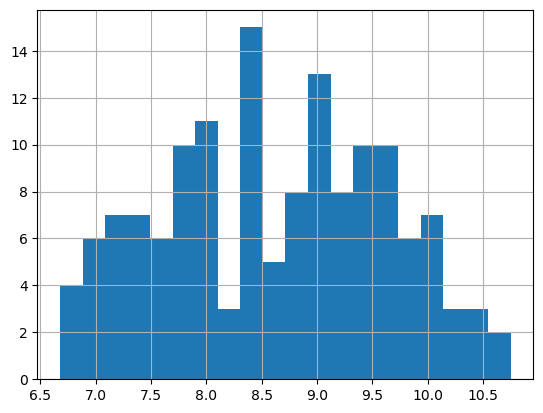

In [30]:
# Similar to above except largest peak is closer to the center

df['boxcox_passengers'].hist(bins=20);

**Note that you don't use Box Cox transform very often because time series analysis involves many combinations of techniques.**